# Modeling

In [1]:
import pandas as pd
from datetime import datetime


# Lectura de datos
df = pd.read_csv("data/retail_clean.csv")

## Agrupación RFM por cliente

In [2]:
# Asegurarse de que InvoiceDate sea datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Fecha de referencia para cálculo de Recency
fecha_ref = df['InvoiceDate'].max()

# Agrupación RFM
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (fecha_ref - x.max()).days,
    'Invoice': 'nunique',
    'TotalSale': 'sum'
}).reset_index()

# Renombrar columnas
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,12,77556.46
1,12347.0,1,8,5633.32
2,12348.0,74,5,2019.40
3,12349.0,18,4,4428.69
4,12350.0,309,1,334.40


### Escalado de datos

In [3]:
from sklearn.preprocessing import StandardScaler

# Escalar RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


### Clusters optimos

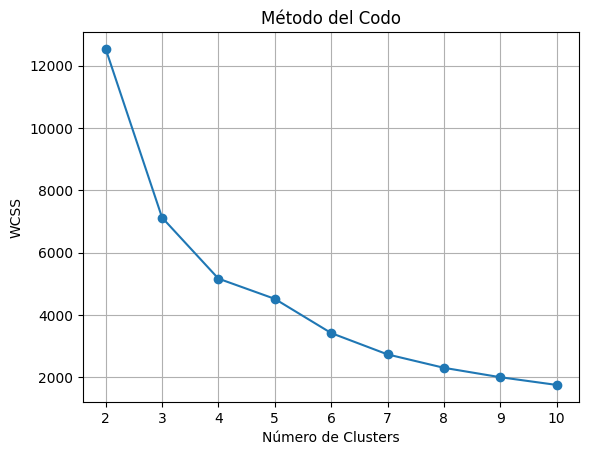

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

El k debera ser de 5

### Entrenamiento de K Means

In [6]:
# Elegir número de clusters
kmeans = KMeans(n_clusters=5, random_state=42)
rfm['Segmento'] = kmeans.fit_predict(rfm_scaled)

### Evaluacion del Modelo

In [7]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(rfm_scaled, rfm['Segmento'])
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.495


### Analisis de segmentos

In [8]:
rfm.groupby('Segmento').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
})

Recency   Frequency       Monetary      
                mean        mean           mean count
Segmento                                             
0         333.181113    2.683700     900.972310  1546
1          49.419821    7.776943    3225.415673  3461
2          24.942857  103.714286   83086.079771    35
3           2.500000  212.500000  436835.792500     4
4         589.576923    1.711538     639.430748   832